In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import polars as ps
import pandas as pd
import scipy as sp

In [2]:
WS = pd.read_excel('./Dados_C100_patricio.xlsx')
df_c100 = ps.DataFrame(WS)
#WS = pd.read_excel('./Tensão_vs_SoC_C100.xlsx')
#df_soc = ps.DataFrame(WS)

In [3]:
points100A = [
36,
17299,
34586,
51912,
69298,
86728,
104172,
121666,
139361,
157114,]

points28A = [
4483,
21738,
39026,
56352,
73738,
91168,
108612,
126106,
143801,
161554,]

points3A = [
2267,
19523,
36810,
54136,
71522,
88952,
106396,
123890,
141585,
159338,]

In [4]:
def modelo_2rc(t, v0, v1, v2, t1, t2):
    return v0+v1*np.exp(-t*t1)+v2*np.exp(-t*t2)

In [5]:
def get_t_v(p1, df):
    p1, p2 = p1, p1+200
    corrente = df['Corrente [A]'][p1-1]
    v_zp1 = df['Tensão [V]'][p1-1]

    df_teste = df[p1:p2][['Tempo [s]', 'Tensão [V]']].clone()
    df_teste = df_teste.select([ps.col('Tempo [s]').alias('t'), ps.col('Tensão [V]').alias('v')])

    vmin = df_teste['v'].min()
    vmax = df_teste['v'].max()

    df_teste['t'] = df_teste['t']-df_teste['t'][0]
    df_teste['v'] = df_teste['v']-df_teste['v'][0]

    t = df_teste['t'].to_numpy()
    v = df_teste['v'].to_numpy()
    return t, v, corrente, vmin, vmax, v_zp1

Curva 0: -100 A
3.343 v_max, 3.321 v_min, 2.20000e-02 ΔV
3.287 v_r0, 3.39993e-04 r0
2.179e-02 v0, -1.588e-02 v1, -5.24649e-03 v2
3.973e-02 t1, 1.588e-04 r1, 2.501e+02 c1
2.788e-03 t2, 5.246e-05 r2, 5.313e+01 c2 



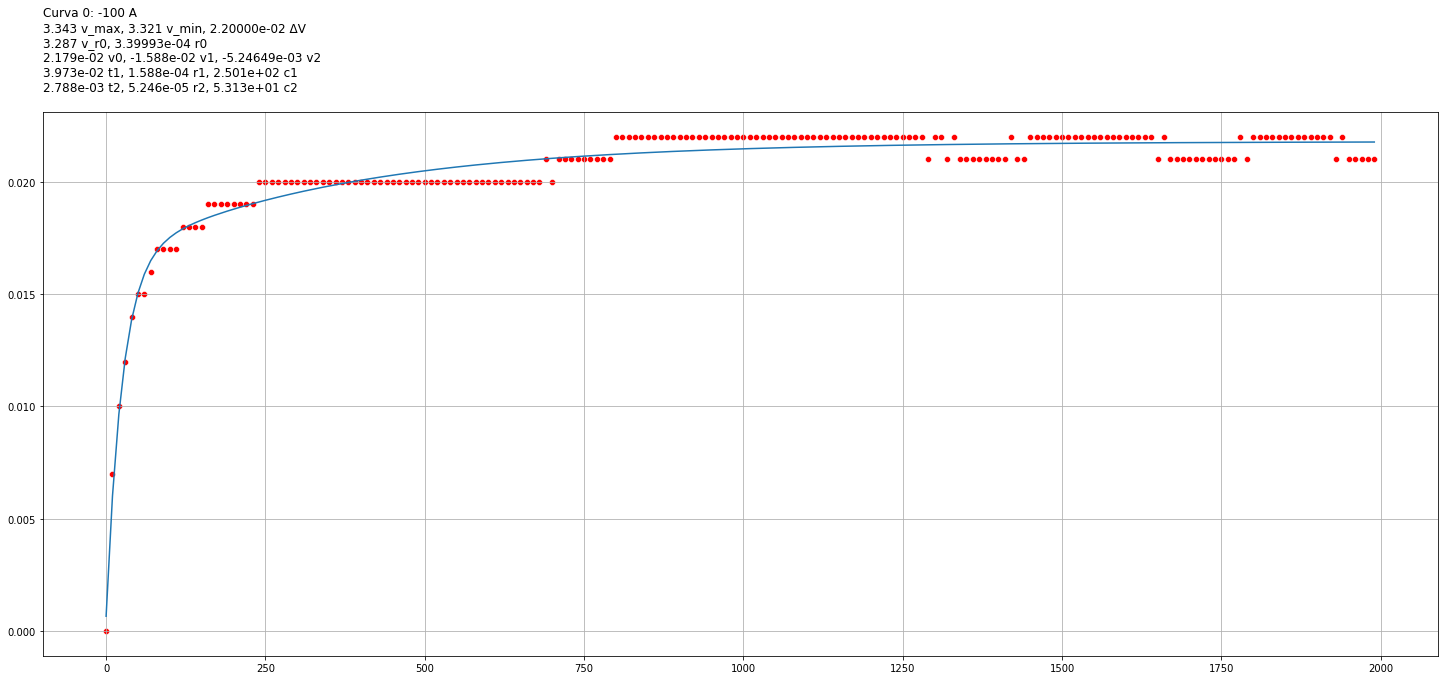

Curva 1: -100 A
3.319 v_max, 3.287 v_min, 3.20000e-02 ΔV
3.254 v_r0, 3.29993e-04 r0
3.193e-02 v0, -2.116e-02 v1, -9.80515e-03 v2
3.186e-02 t1, 2.116e-04 r1, 1.506e+02 c1
2.122e-03 t2, 9.805e-05 r2, 2.165e+01 c2 



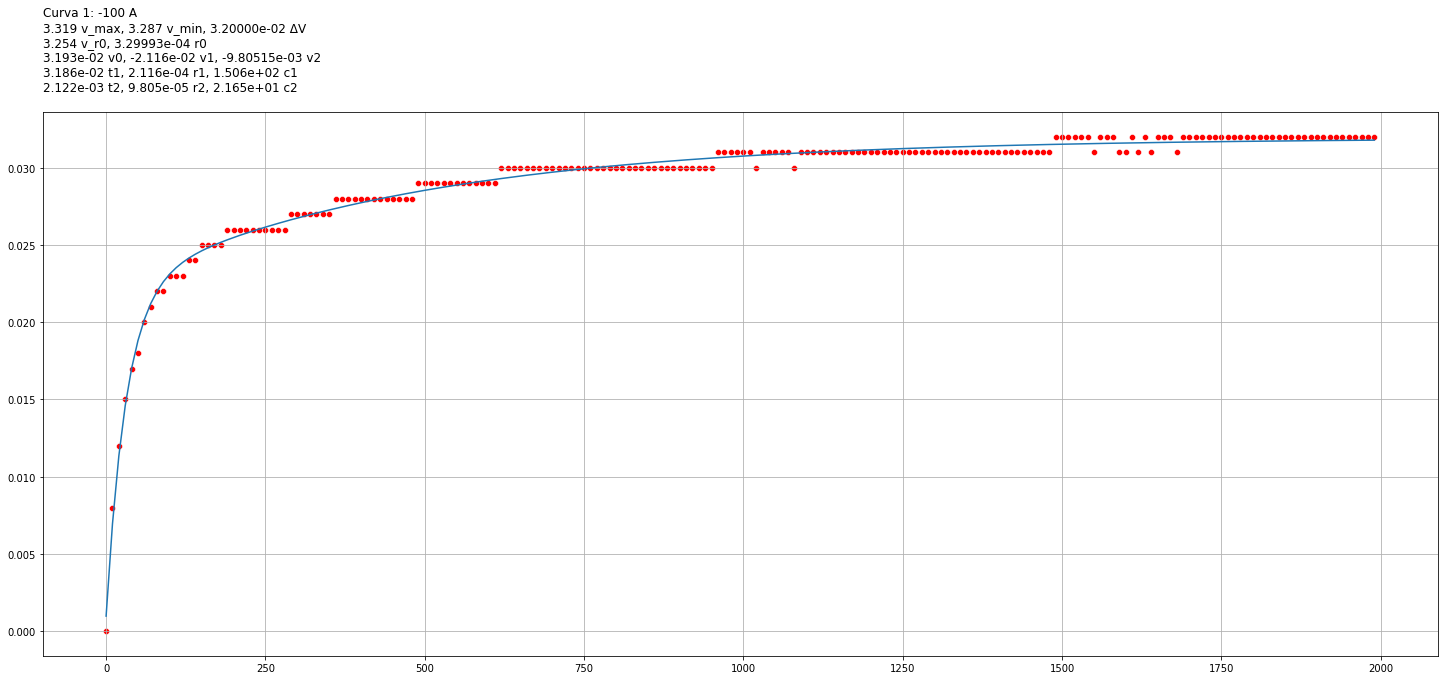

Curva 2: -100 A
3.317 v_max, 3.279 v_min, 3.80000e-02 ΔV
3.245 v_r0, 3.39993e-04 r0
3.855e-02 v0, -2.371e-02 v1, -1.25697e-02 v2
2.425e-02 t1, 2.371e-04 r1, 1.023e+02 c1
1.450e-03 t2, 1.257e-04 r2, 1.154e+01 c2 



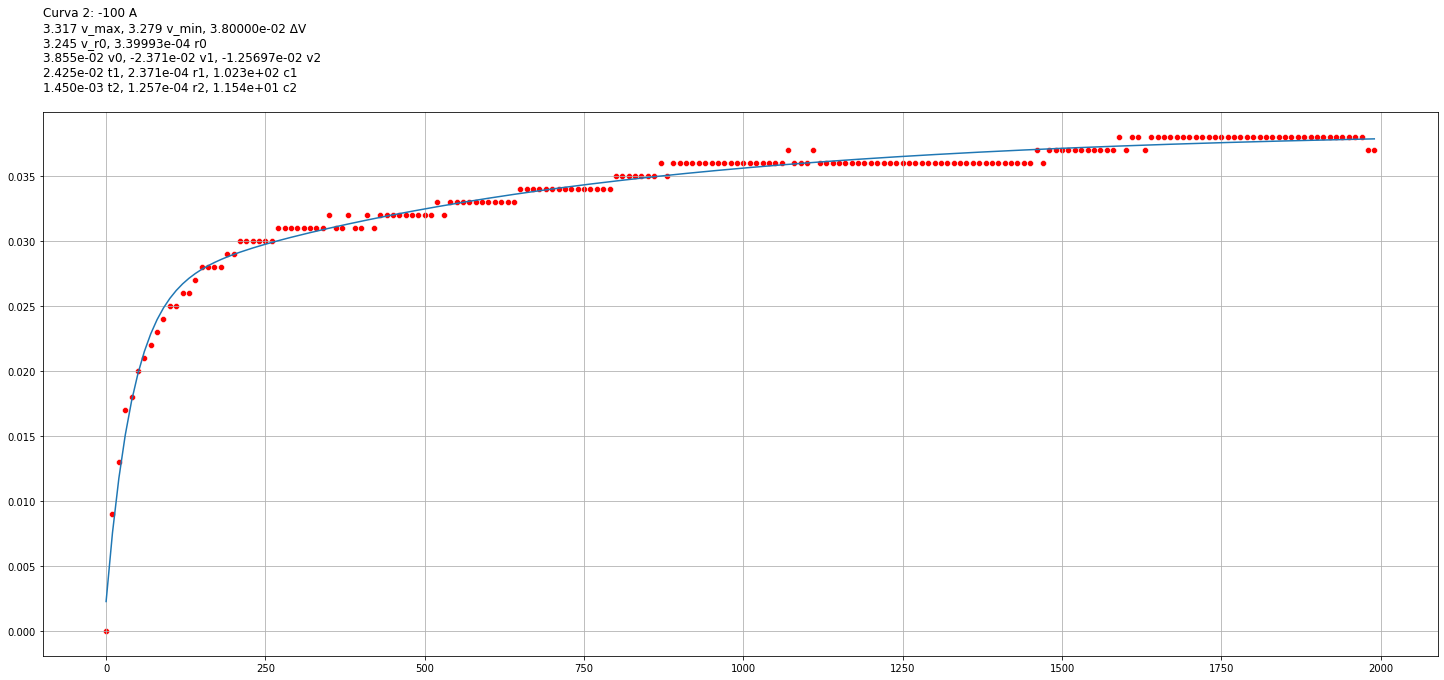

Curva 3: -100 A
3.304 v_max, 3.26 v_min, 4.40000e-02 ΔV
3.225 v_r0, 3.49993e-04 r0
4.619e-02 v0, -2.121e-02 v1, -2.30045e-02 v2
2.482e-02 t1, 2.121e-04 r1, 1.170e+02 c1
1.036e-03 t2, 2.300e-04 r2, 4.502e+00 c2 



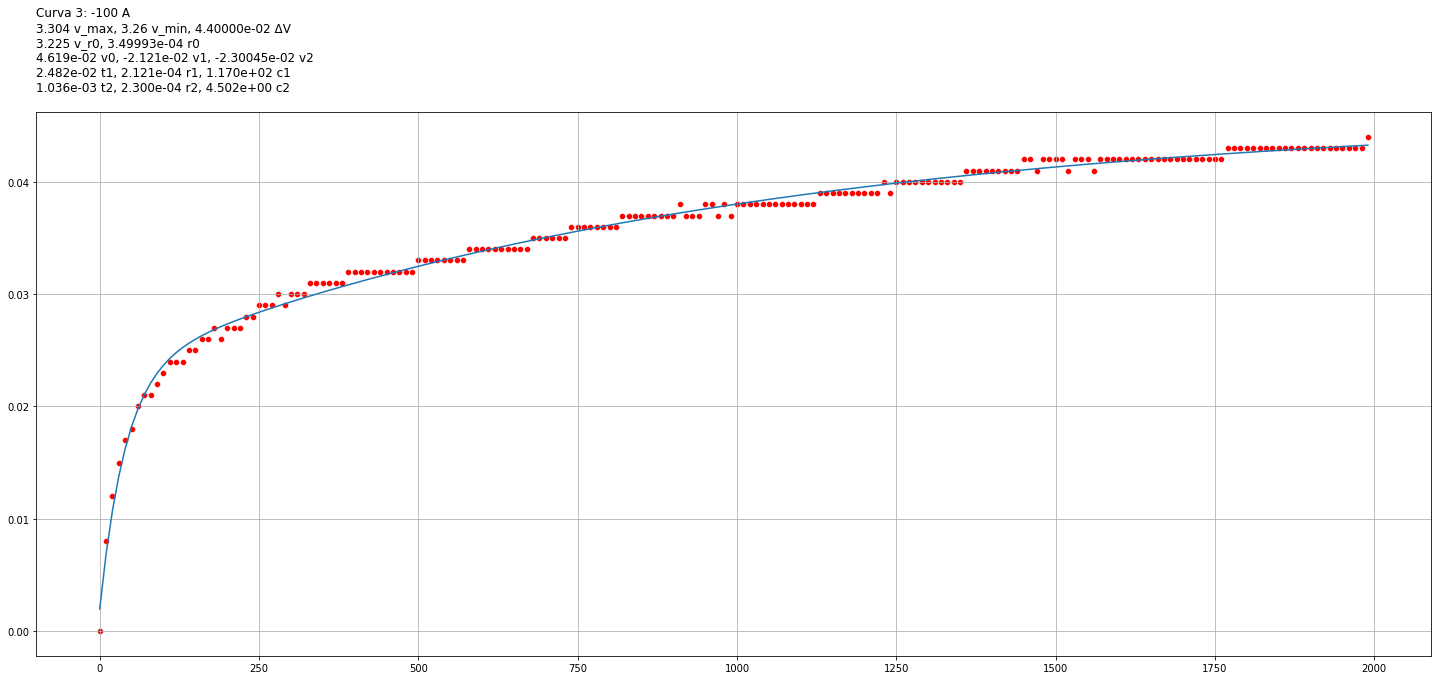

Curva 4: -100 A
3.28 v_max, 3.249 v_min, 3.10000e-02 ΔV
3.215 v_r0, 3.39993e-04 r0
3.082e-02 v0, -2.006e-02 v1, -9.35522e-03 v2
3.484e-02 t1, 2.006e-04 r1, 1.737e+02 c1
1.520e-03 t2, 9.355e-05 r2, 1.625e+01 c2 



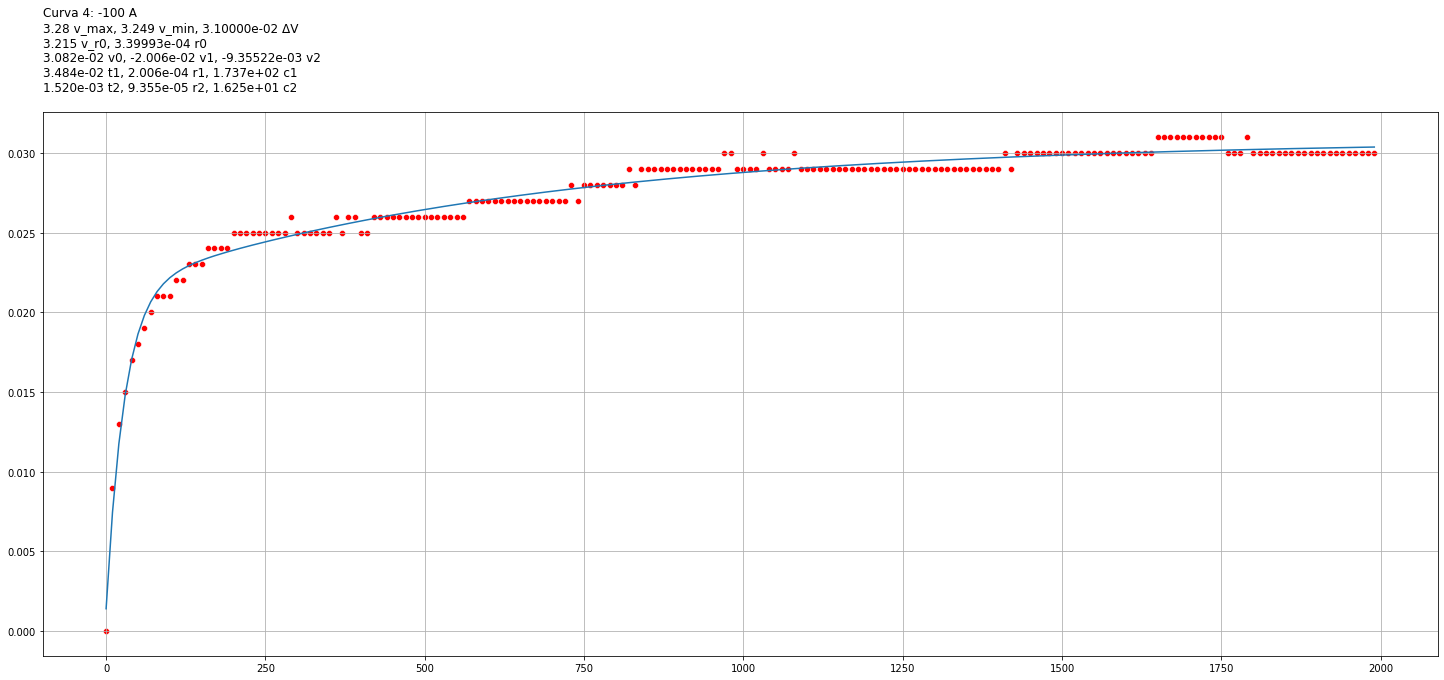

Curva 5: -100 A
3.276 v_max, 3.242 v_min, 3.40000e-02 ΔV
3.207 v_r0, 3.49993e-04 r0
3.400e-02 v0, -2.127e-02 v1, -1.09340e-02 v2
3.351e-02 t1, 2.127e-04 r1, 1.575e+02 c1
1.732e-03 t2, 1.093e-04 r2, 1.585e+01 c2 



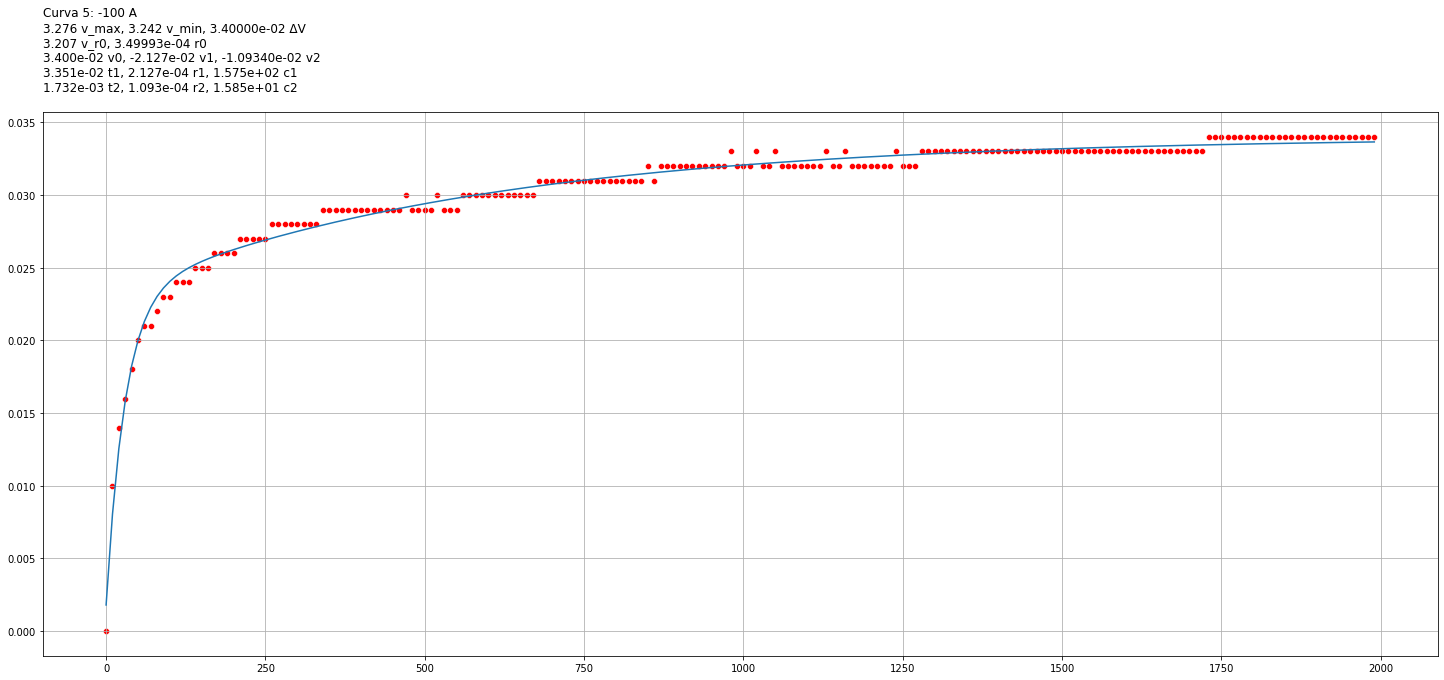

Curva 6: -100 A
3.275 v_max, 3.237 v_min, 3.80000e-02 ΔV
3.2 v_r0, 3.70000e-04 r0
3.870e-02 v0, -2.215e-02 v1, -1.49911e-02 v2
3.428e-02 t1, 2.215e-04 r1, 1.547e+02 c1
1.406e-03 t2, 1.499e-04 r2, 9.377e+00 c2 



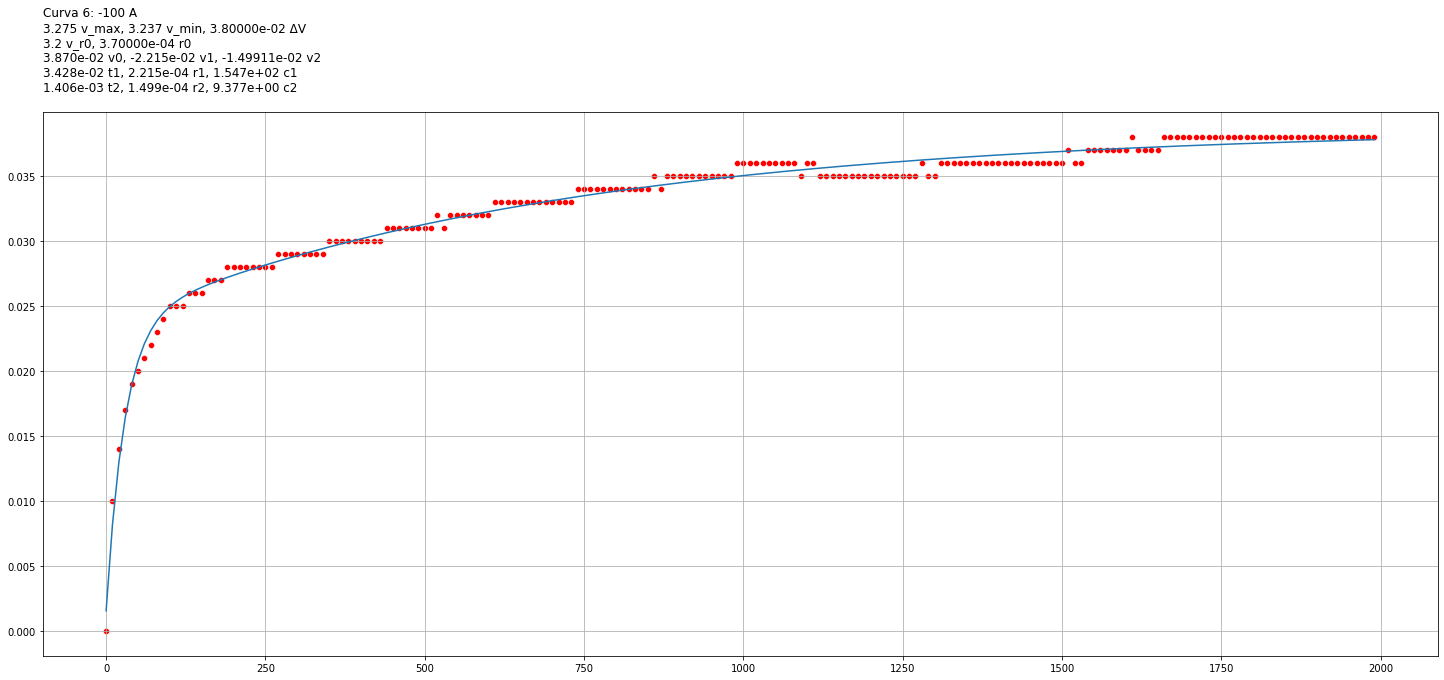

Curva 7: -100 A
3.249 v_max, 3.211 v_min, 3.80000e-02 ΔV
3.174 v_r0, 3.69993e-04 r0
3.749e-02 v0, -2.265e-02 v1, -1.31493e-02 v2
3.705e-02 t1, 2.265e-04 r1, 1.636e+02 c1
1.532e-03 t2, 1.315e-04 r2, 1.165e+01 c2 



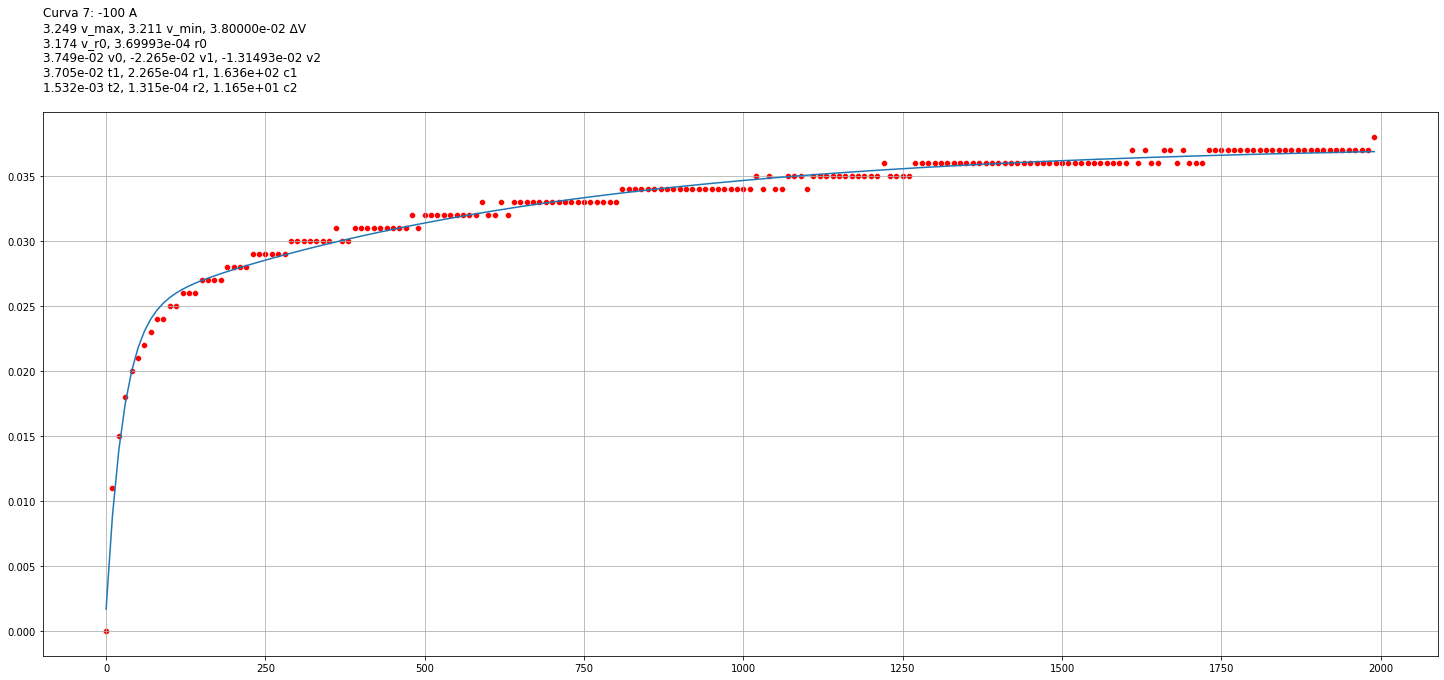

Curva 8: -100 A
3.186 v_max, 3.148 v_min, 3.80000e-02 ΔV
3.11 v_r0, 3.79992e-04 r0
3.732e-02 v0, -2.269e-02 v1, -1.39861e-02 v2
6.646e-02 t1, 2.269e-04 r1, 2.929e+02 c1
3.785e-03 t2, 1.399e-04 r2, 2.706e+01 c2 



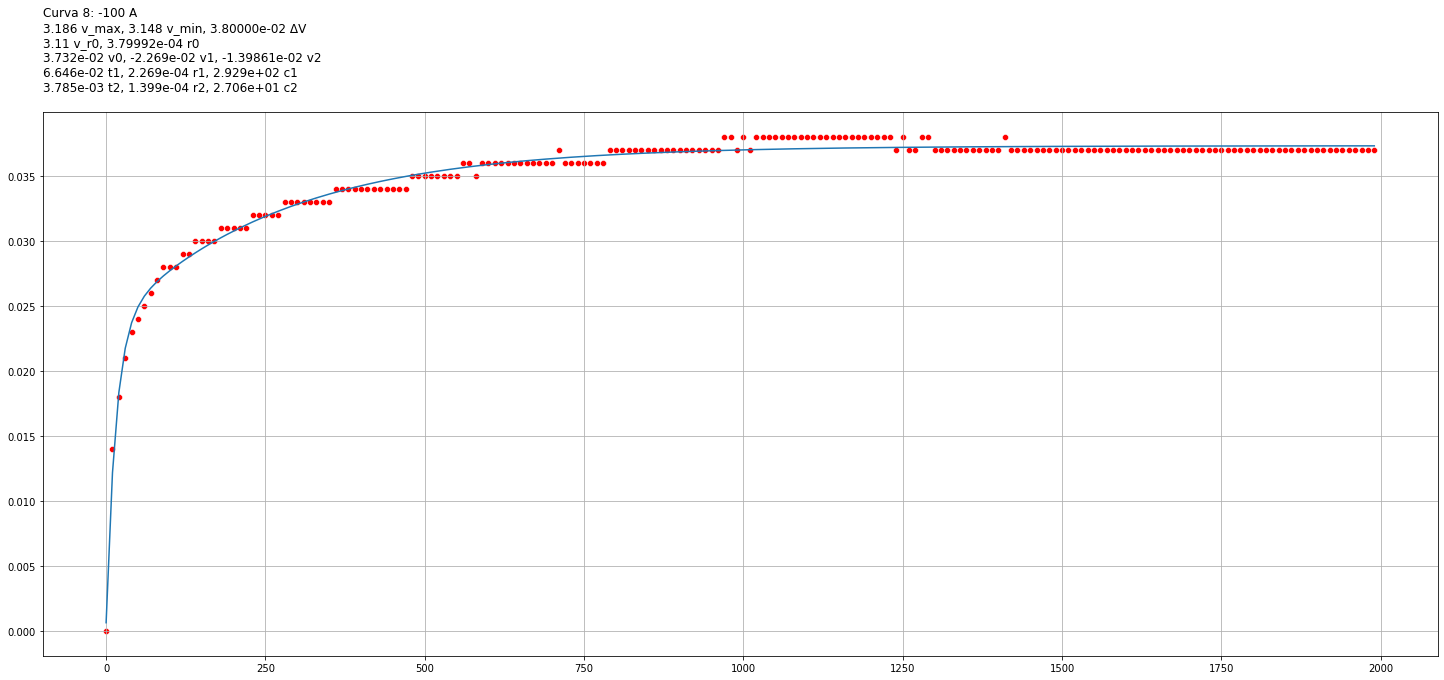

Curva 9: -100 A
3.184 v_max, 3.133 v_min, 5.10000e-02 ΔV
3.092 v_r0, 4.09992e-04 r0
5.047e-02 v0, -3.048e-02 v1, -1.77098e-02 v2
4.337e-02 t1, 3.048e-04 r1, 1.423e+02 c1
1.854e-03 t2, 1.771e-04 r2, 1.047e+01 c2 



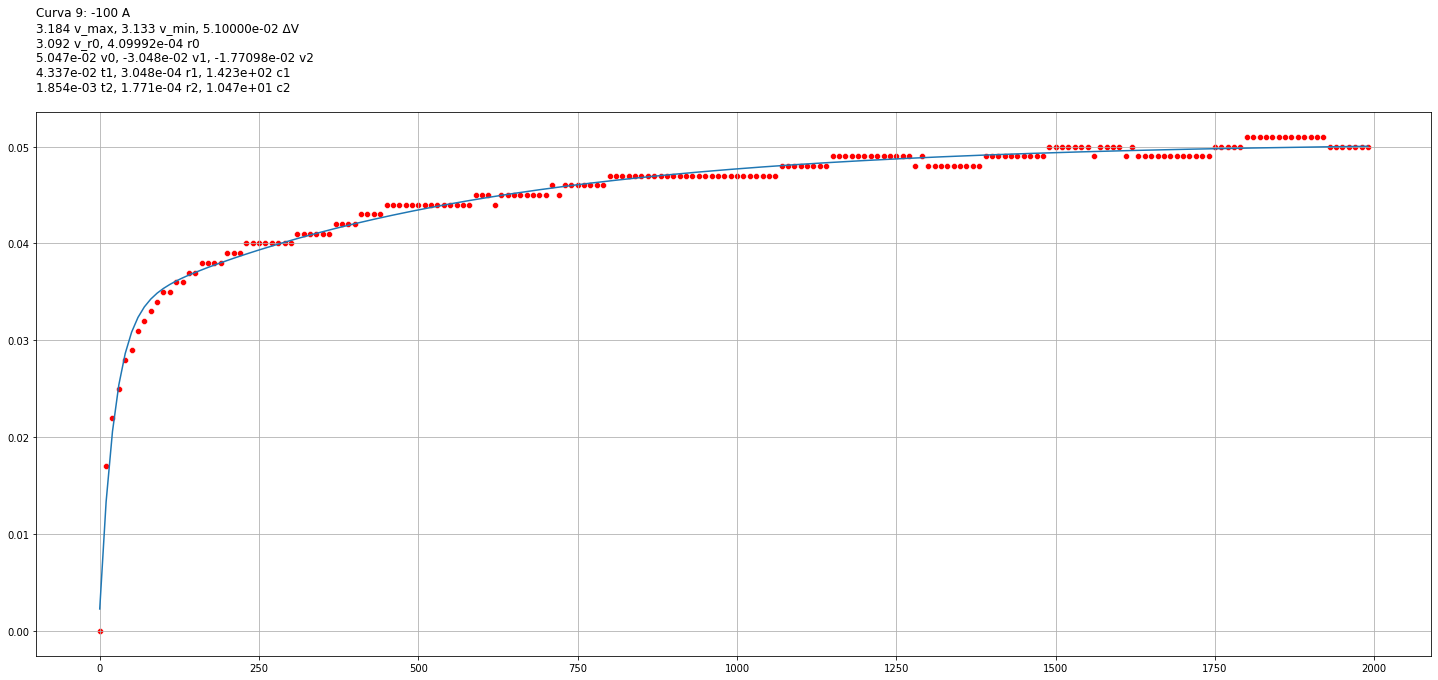

In [6]:
# chute inicial
p0 = np.array([3.2247626343e-02, -2.11580237e-02, -9.80514235e-03,  3.18578442e-02, 2.12246228e-03])+np.random.normal(0, 0.001, 5)

# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, 100, 100])

for i, p1 in enumerate(points100A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = vals[3]
    tau2 = vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = vals[1]/corrente
    r2 = vals[2]/corrente
    c1 = vals[3]*corrente/vals[1]
    c2 = vals[4]*corrente/vals[2]

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()


Curva 0: -28 A
3.342 v_max, 3.332 v_min, 1.00000e-02 ΔV
3.324 v_r0, 2.85694e-04 r0
2.109e+00 v0, -4.729e-02 v1, -2.09047e+00 v2
3.825e+01 t1, 1.689e-03 r1, 2.265e+04 c1
-3.349e-06 t2, 7.465e-02 r2, -4.486e-05 c2 



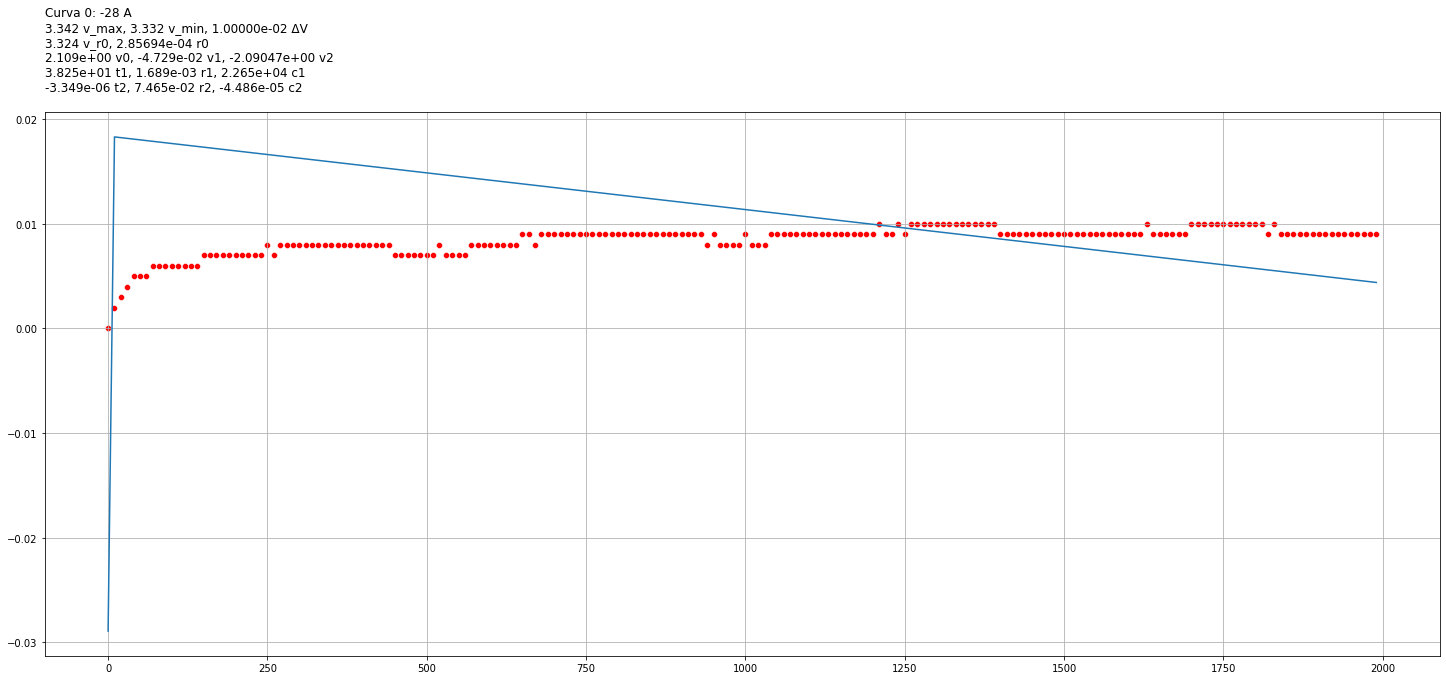

Curva 1: -28 A
3.321 v_max, 3.291 v_min, 3.00000e-02 ΔV
3.291 v_r0, 0.00000e+00 r0
2.917e-02 v0, -1.362e-02 v1, -1.55486e-02 v2
3.824e+01 t1, 4.865e-04 r1, 7.859e+04 c1
2.453e-03 t2, 5.553e-04 r2, 4.417e+00 c2 



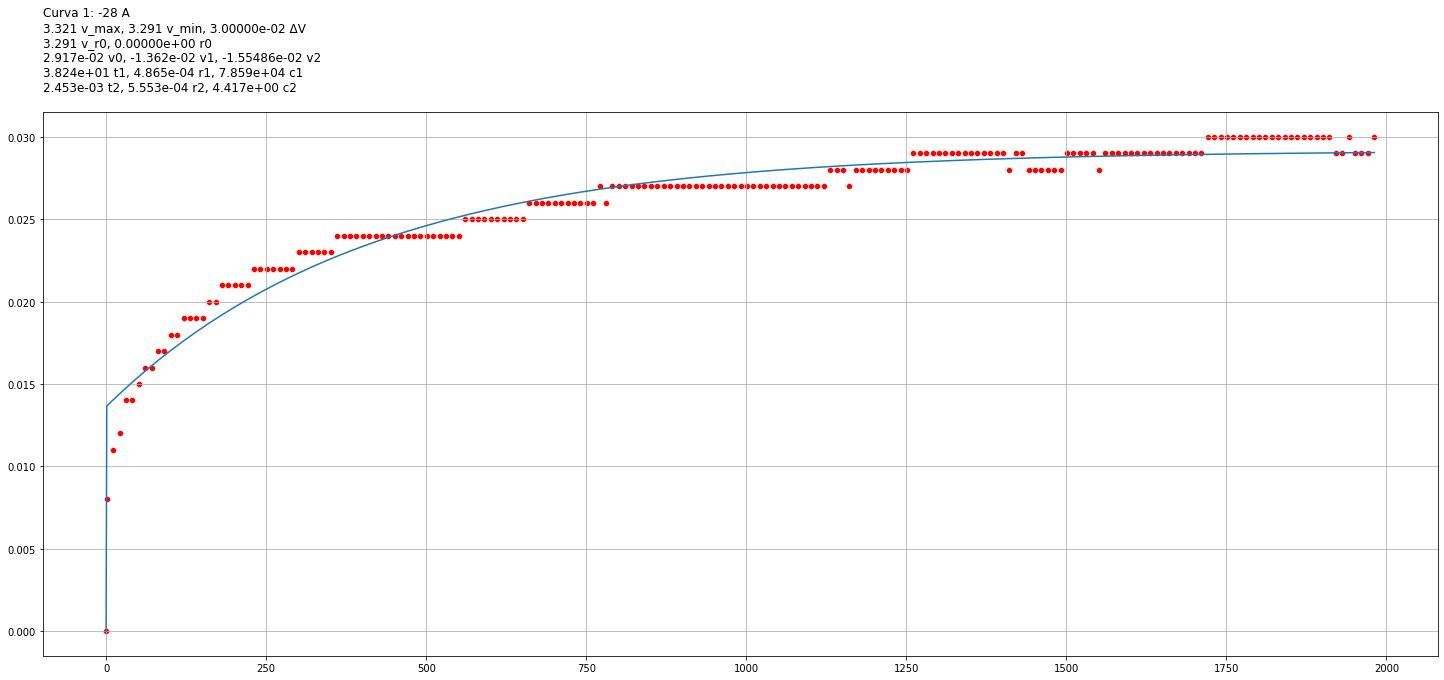

Curva 2: -28 A
3.321 v_max, 3.298 v_min, 2.30000e-02 ΔV
3.289 v_r0, 3.21406e-04 r0
2.191e-02 v0, -6.693e-03 v1, -1.52149e-02 v2
7.647e+01 t1, 2.390e-04 r1, 3.200e+05 c1
2.670e-03 t2, 5.434e-04 r2, 4.913e+00 c2 



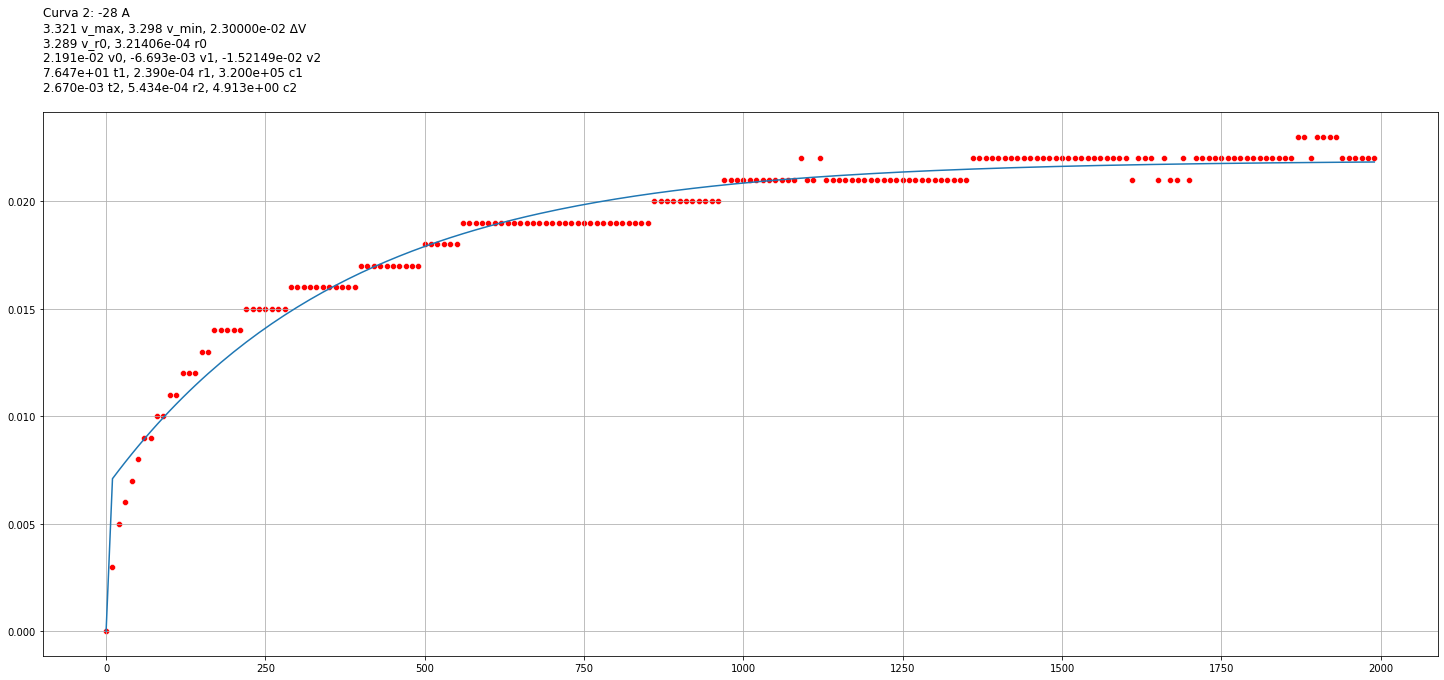

Curva 3: -28 A
3.315 v_max, 3.294 v_min, 2.10000e-02 ΔV
3.285 v_r0, 3.21406e-04 r0
2.034e-02 v0, -6.408e-03 v1, -1.39435e-02 v2
4.705e+01 t1, 2.288e-04 r1, 2.056e+05 c1
2.813e-03 t2, 4.979e-04 r2, 5.649e+00 c2 



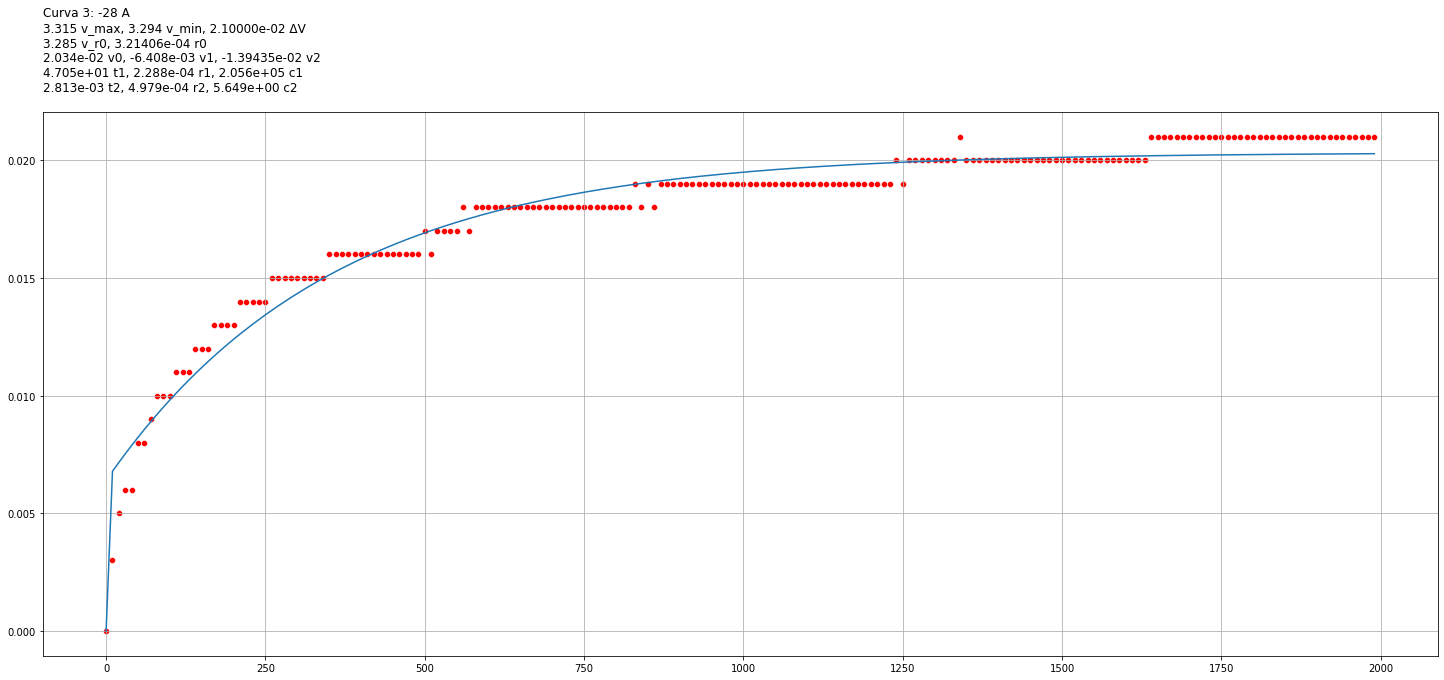

Curva 4: -28 A
3.284 v_max, 3.263 v_min, 2.10000e-02 ΔV
3.254 v_r0, 3.21406e-04 r0
2.052e-02 v0, -6.407e-03 v1, -1.41149e-02 v2
7.058e+01 t1, 2.288e-04 r1, 3.085e+05 c1
3.166e-03 t2, 5.041e-04 r2, 6.282e+00 c2 



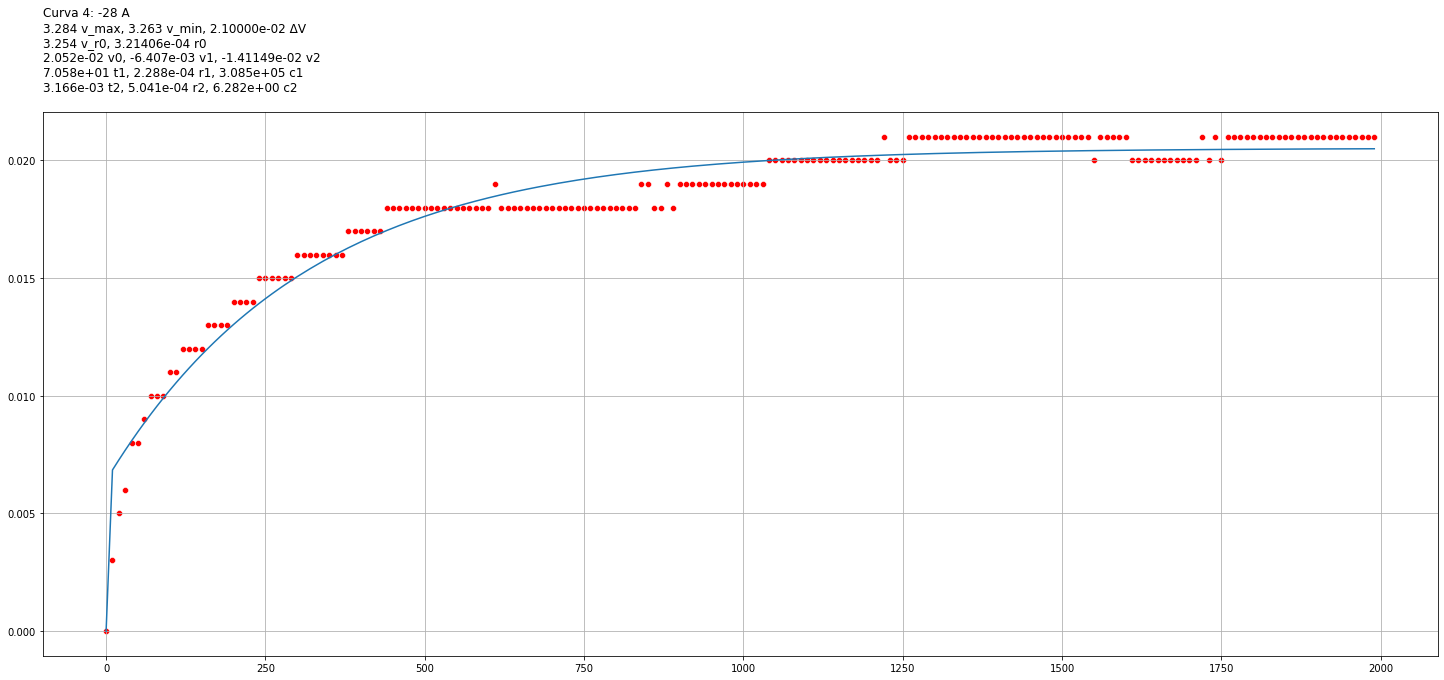

Curva 5: -28 A
3.282 v_max, 3.262 v_min, 2.00000e-02 ΔV
3.253 v_r0, 3.21406e-04 r0
1.926e-02 v0, -6.298e-03 v1, -1.29660e-02 v2
5.883e+01 t1, 2.249e-04 r1, 2.616e+05 c1
3.095e-03 t2, 4.630e-04 r2, 6.684e+00 c2 



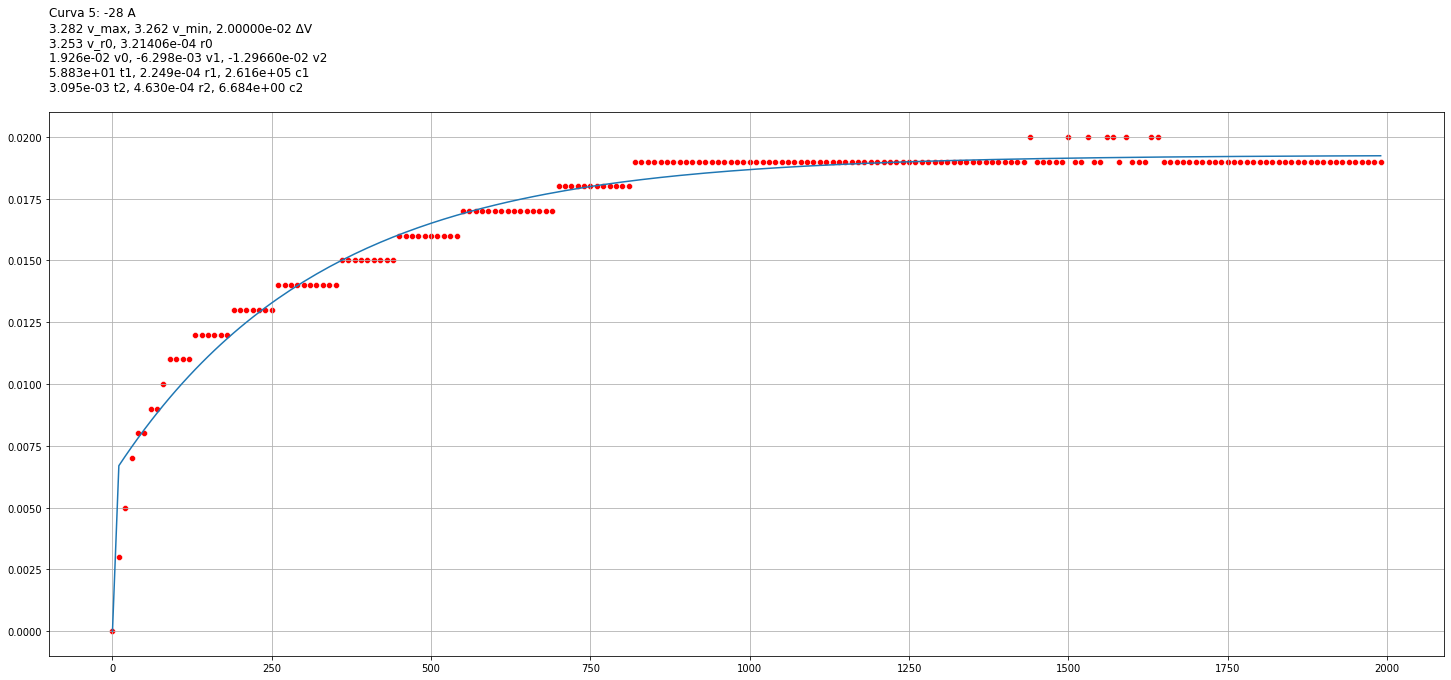

Curva 6: -28 A
3.279 v_max, 3.258 v_min, 2.10000e-02 ΔV
3.25 v_r0, 2.85694e-04 r0
2.055e-02 v0, -7.530e-03 v1, -1.30162e-02 v2
7.354e+01 t1, 2.689e-04 r1, 2.735e+05 c1
2.970e-03 t2, 4.648e-04 r2, 6.389e+00 c2 



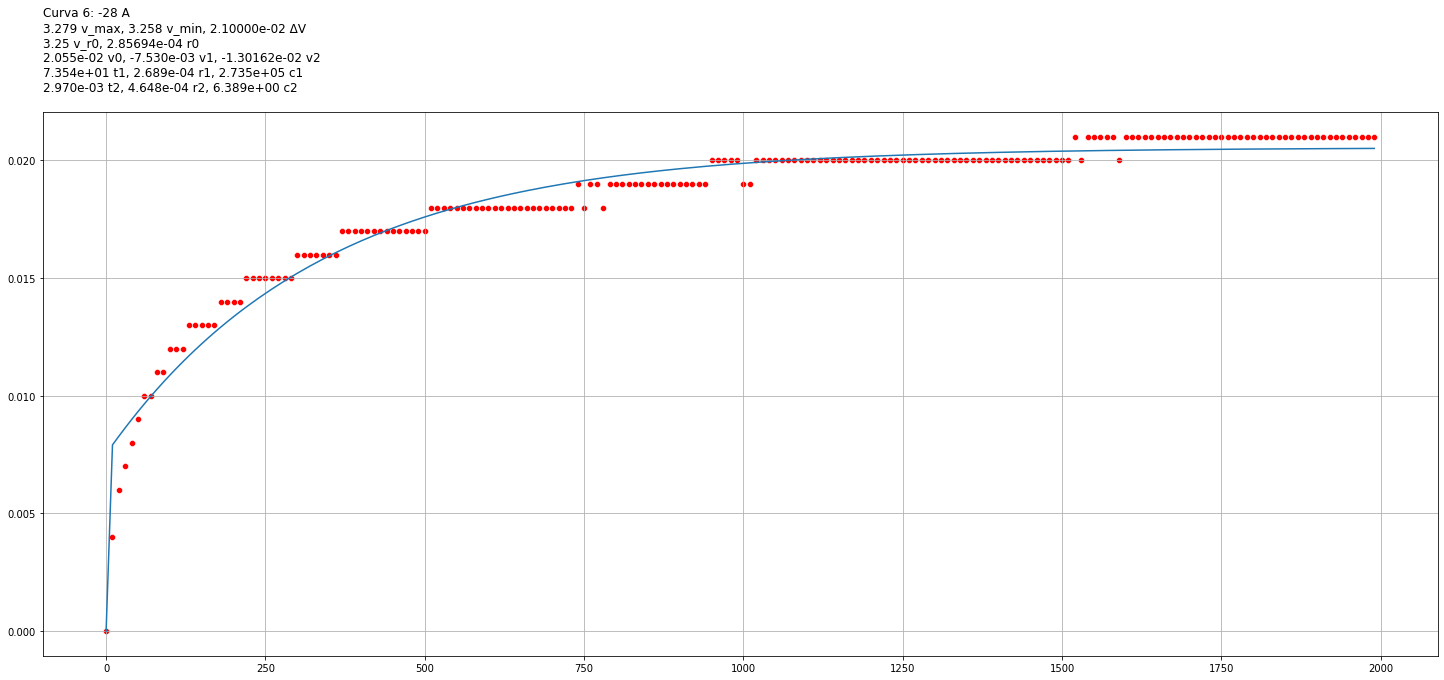

Curva 7: -28 A
3.259 v_max, 3.237 v_min, 2.20000e-02 ΔV
3.228 v_r0, 3.21406e-04 r0
2.057e-02 v0, -7.380e-03 v1, -1.31860e-02 v2
5.316e+01 t1, 2.636e-04 r1, 2.017e+05 c1
4.407e-03 t2, 4.709e-04 r2, 9.360e+00 c2 



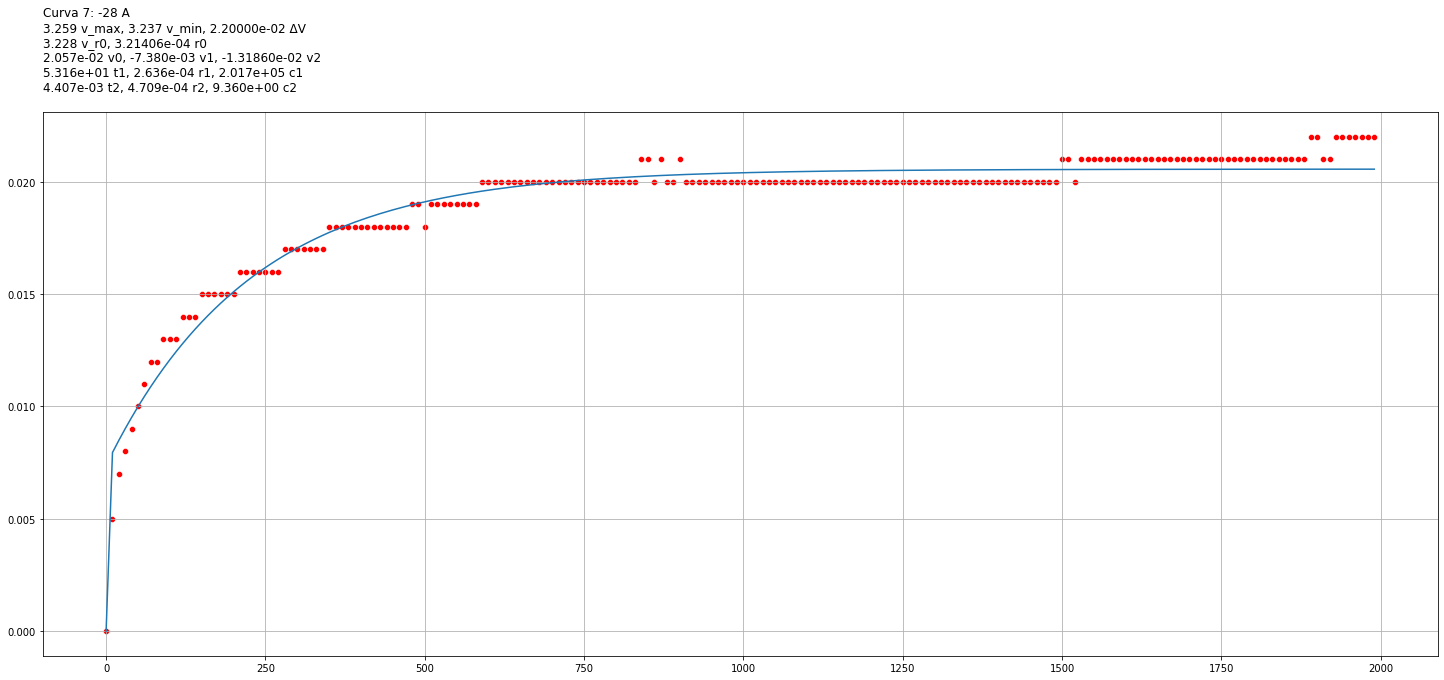

Curva 8: -28 A
3.206 v_max, 3.181 v_min, 2.50000e-02 ΔV
3.171 v_r0, 3.57117e-04 r0
2.353e-02 v0, -8.470e-03 v1, -1.50584e-02 v2
1.329e+01 t1, 3.025e-04 r1, 4.393e+04 c1
4.163e-03 t2, 5.378e-04 r2, 7.741e+00 c2 



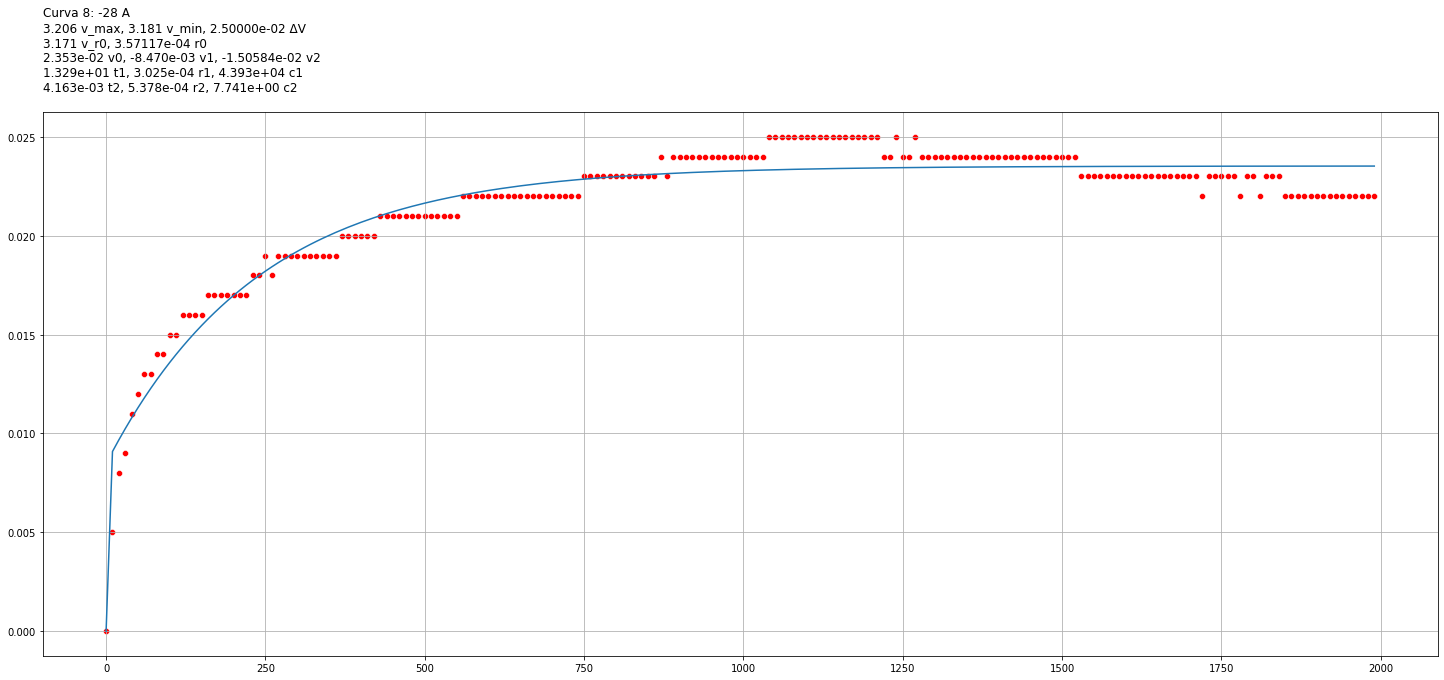

Curva 9: -28 A
3.19 v_max, 3.163 v_min, 2.70000e-02 ΔV
3.153 v_r0, 3.57117e-04 r0
2.638e-02 v0, -1.203e-02 v1, -1.43502e-02 v2
3.322e+01 t1, 4.297e-04 r1, 7.731e+04 c1
1.925e-03 t2, 5.125e-04 r2, 3.757e+00 c2 



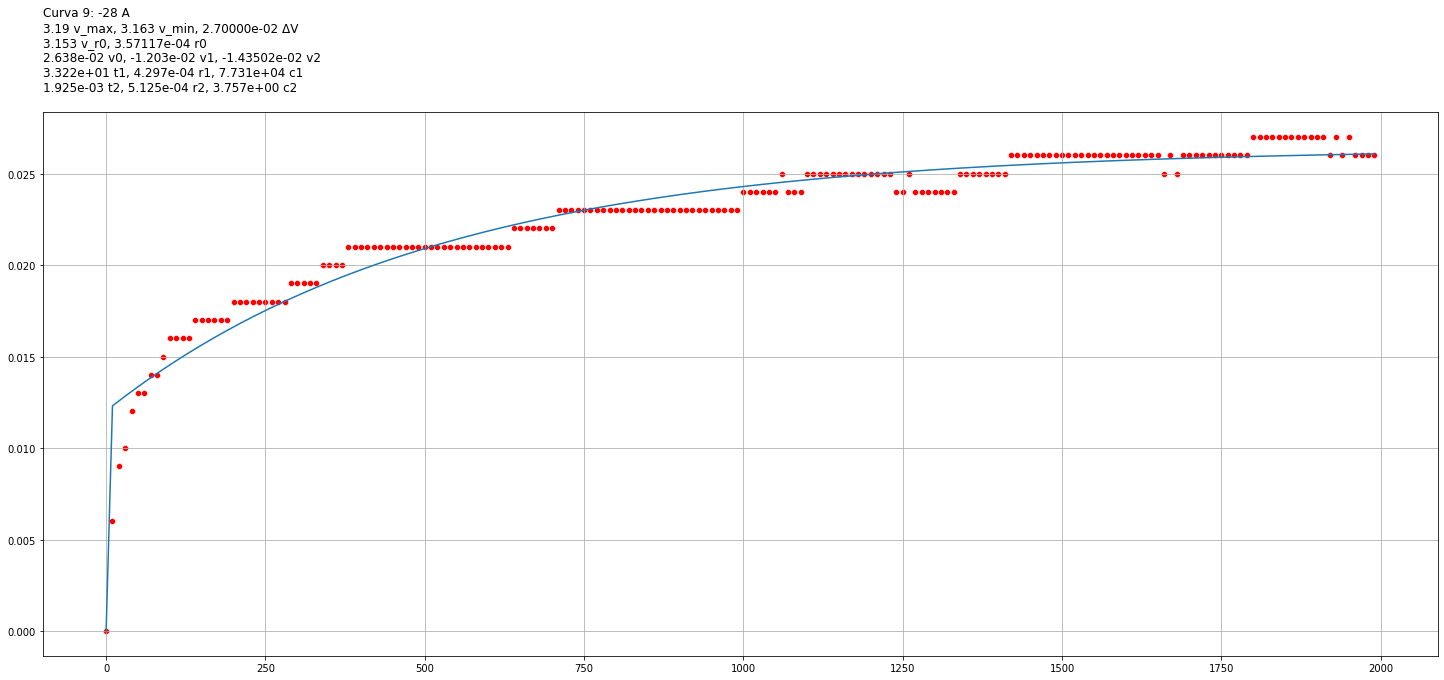

In [9]:
# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, 100, 100])

for i, p1 in enumerate(points28A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = vals[3]
    tau2 = vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = vals[1]/corrente
    r2 = vals[2]/corrente
    c1 = vals[3]*corrente/vals[1]
    c2 = vals[4]*corrente/vals[2]

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()


Curva 0: -3 A
3.419 v_max, 3.414 v_min, 5.00000e-03 ΔV
3.414 v_r0, 0.00000e+00 r0
2.533e-01 v0, -3.048e-03 v1, -2.50140e-01 v2
3.133e-02 t1, 1.015e-03 r1, 3.086e+01 c1
8.830e-07 t2, 8.332e-02 r2, 1.060e-05 c2 



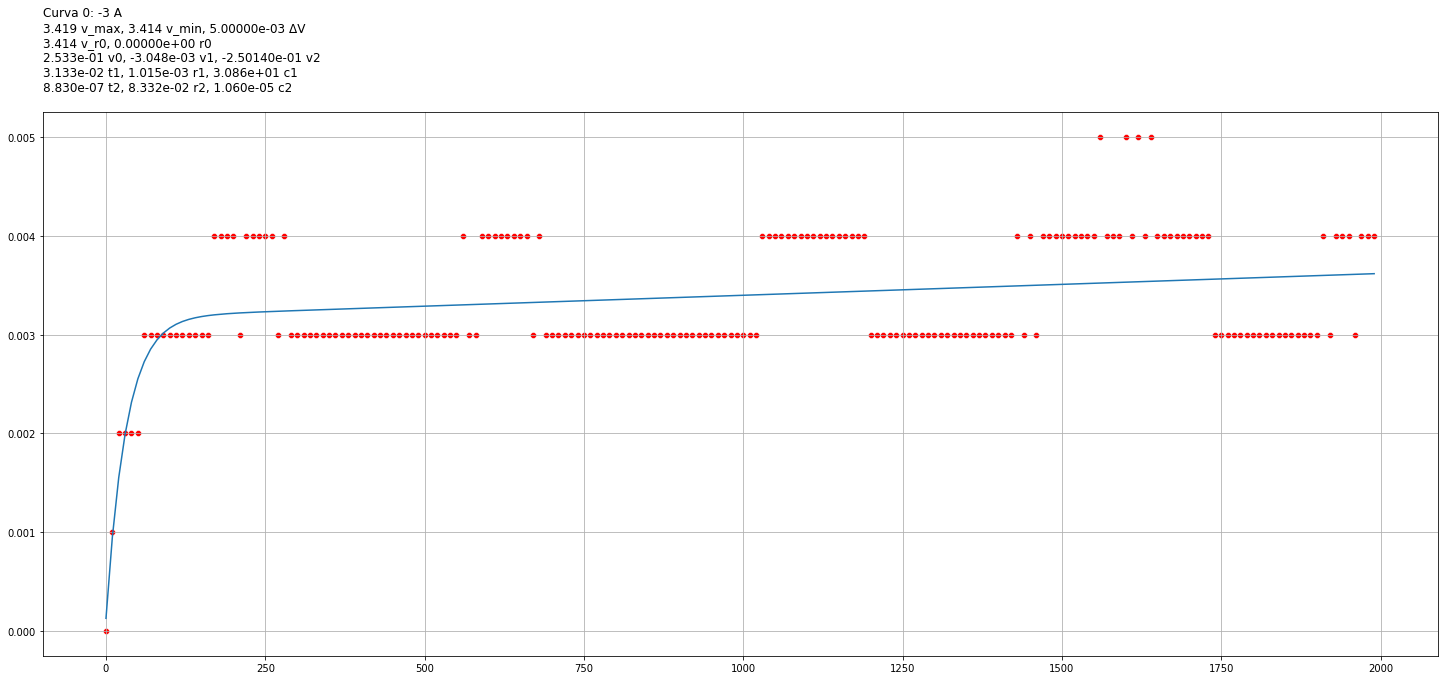

Curva 1: -3 A
3.323 v_max, 3.32 v_min, 3.00000e-03 ΔV
3.319 v_r0, 3.33111e-04 r0
2.512e-01 v0, -3.396e-03 v1, -2.47946e-01 v2
2.701e-03 t1, 1.131e-03 r1, 2.387e+00 c1
-1.196e-06 t2, 8.259e-02 r2, -1.448e-05 c2 



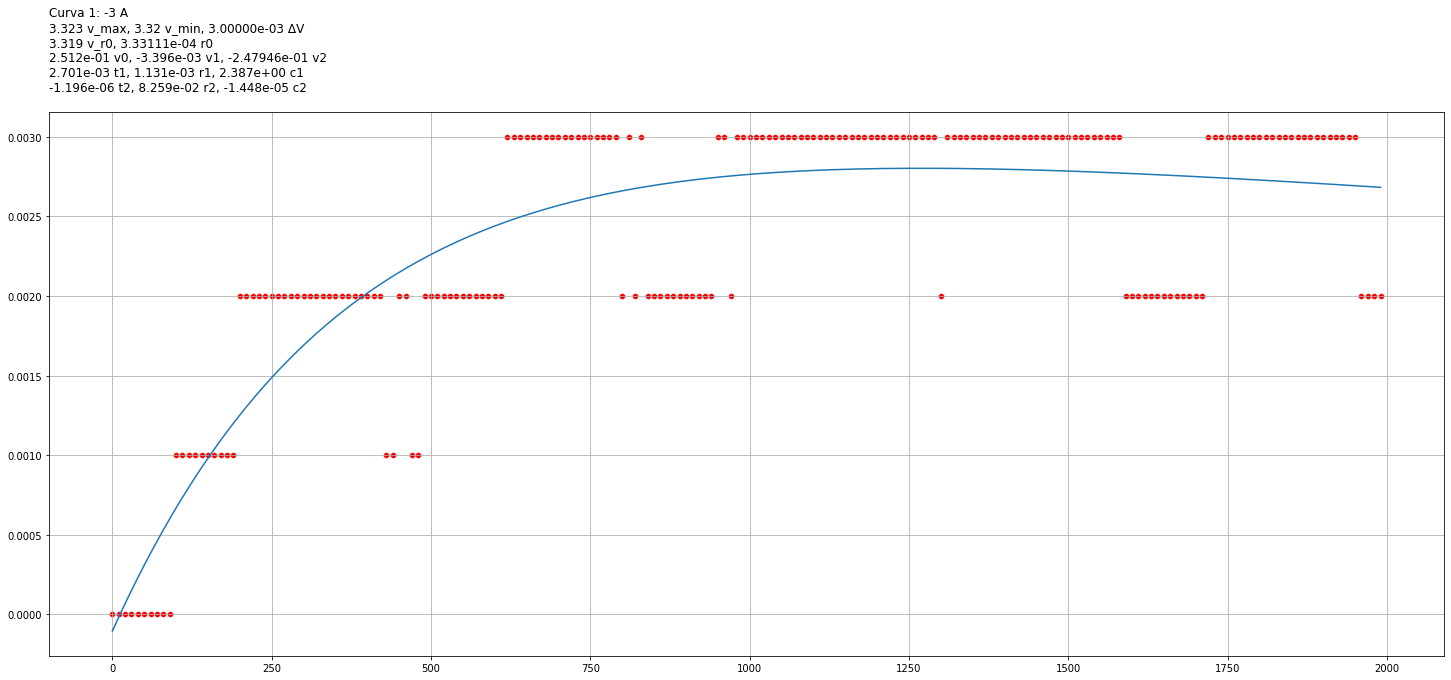

Curva 2: -3 A
3.322 v_max, 3.319 v_min, 3.00000e-03 ΔV
3.319 v_r0, 0.00000e+00 r0
1.389e+00 v0, -3.008e-03 v1, -1.38584e+00 v2
3.538e-03 t1, 1.002e-03 r1, 3.531e+00 c1
-6.760e-07 t2, 4.616e-01 r2, -1.464e-06 c2 



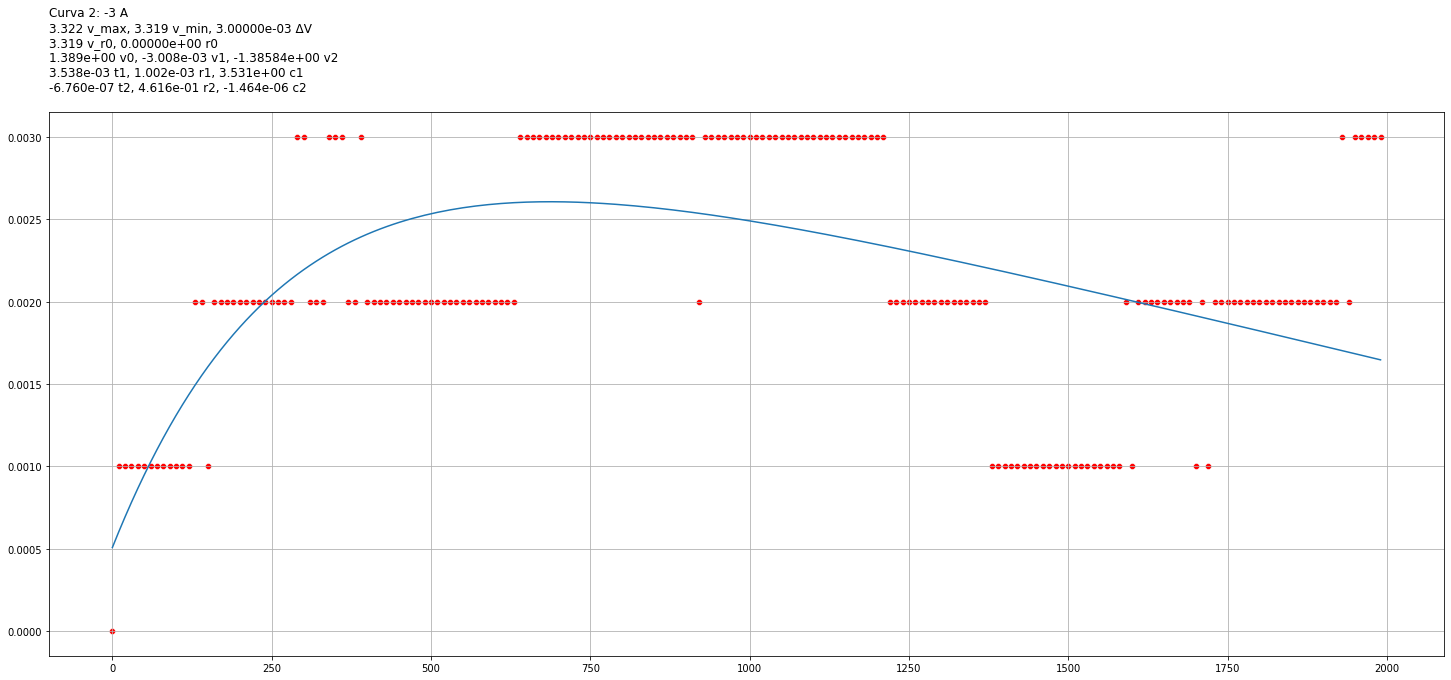

Curva 3: -3 A
3.32 v_max, 3.316 v_min, 4.00000e-03 ΔV
3.316 v_r0, 0.00000e+00 r0
1.390e+00 v0, -1.914e-03 v1, -1.38687e+00 v2
1.815e-03 t1, 6.375e-04 r1, 2.848e+00 c1
-2.035e-07 t2, 4.620e-01 r2, -4.404e-07 c2 



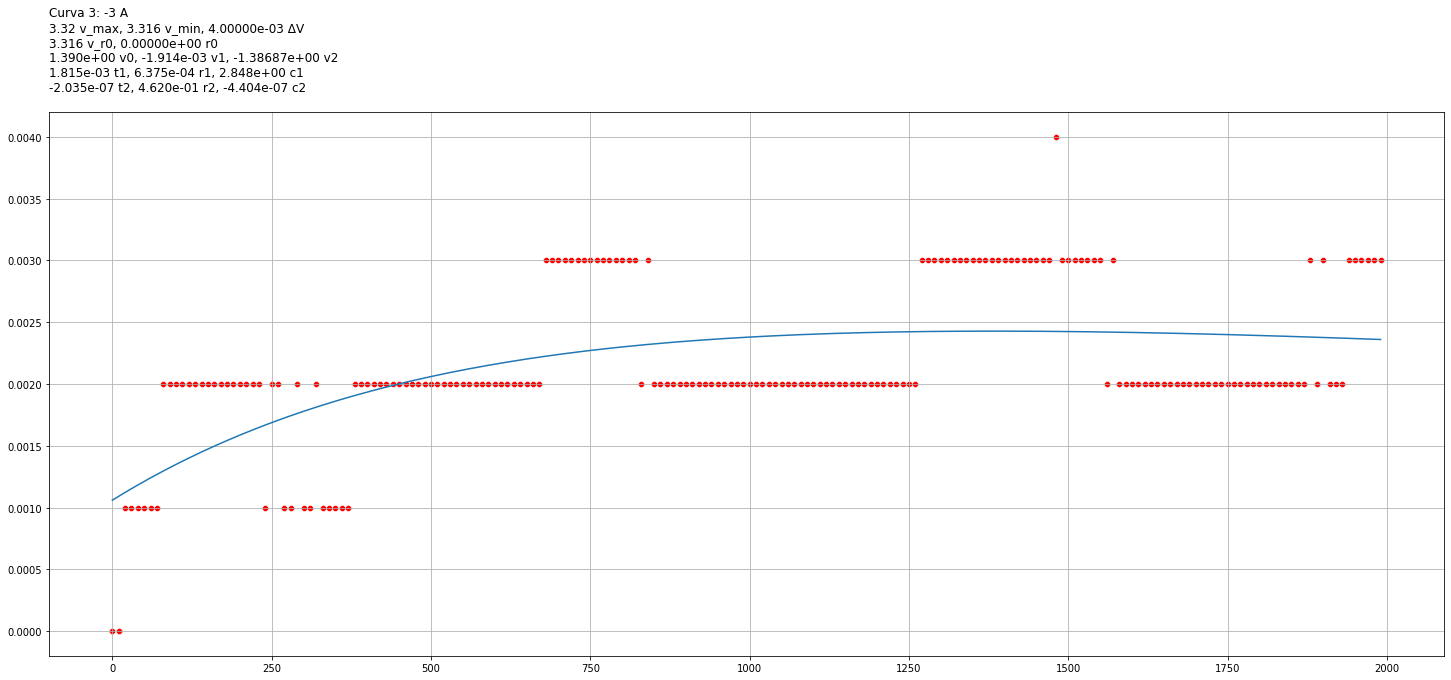

Curva 4: -3 A
3.287 v_max, 3.284 v_min, 3.00000e-03 ΔV
3.283 v_r0, 3.33111e-04 r0
1.207e+00 v0, -2.425e-03 v1, -1.20509e+00 v2
9.794e-03 t1, 8.080e-04 r1, 1.212e+01 c1
1.737e-07 t2, 4.014e-01 r2, 4.326e-07 c2 



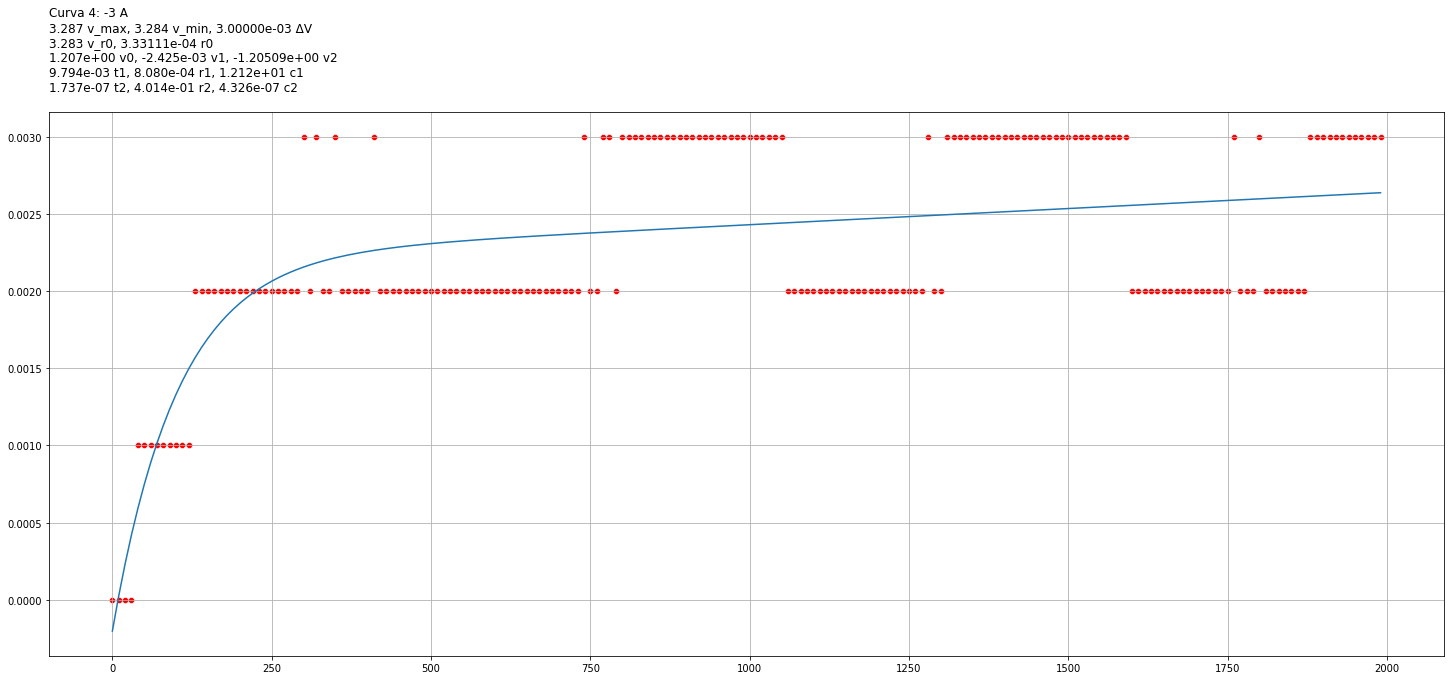

Curva 5: -3 A
3.284 v_max, 3.281 v_min, 3.00000e-03 ΔV
3.281 v_r0, 0.00000e+00 r0
1.236e+00 v0, -3.381e-03 v1, -1.23281e+00 v2
4.794e-03 t1, 1.126e-03 r1, 4.257e+00 c1
-3.823e-07 t2, 4.107e-01 r2, -9.310e-07 c2 



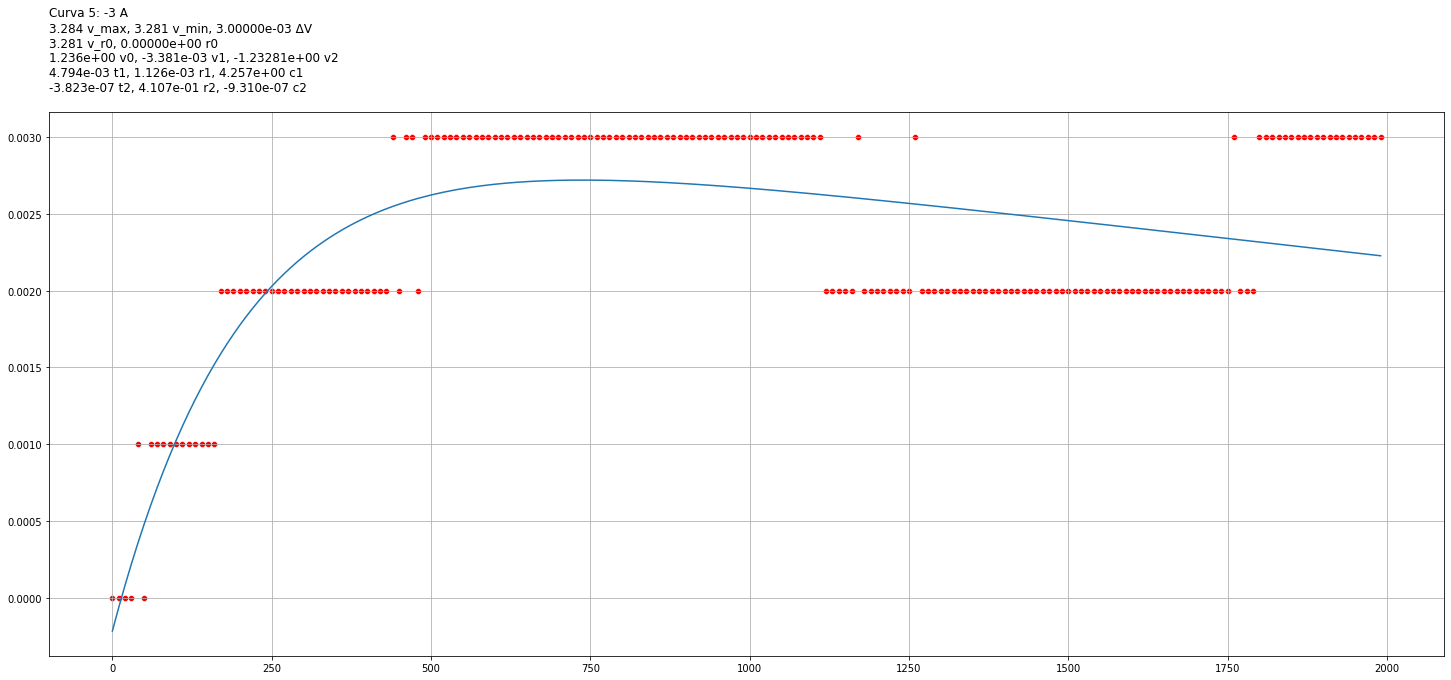

Curva 6: -3 A
3.283 v_max, 3.28 v_min, 3.00000e-03 ΔV
3.281 v_r0, -3.33111e-04 r0
1.229e+00 v0, -2.614e-03 v1, -1.22572e+00 v2
5.252e-03 t1, 8.708e-04 r1, 6.031e+00 c1
-6.171e-08 t2, 4.083e-01 r2, -1.511e-07 c2 



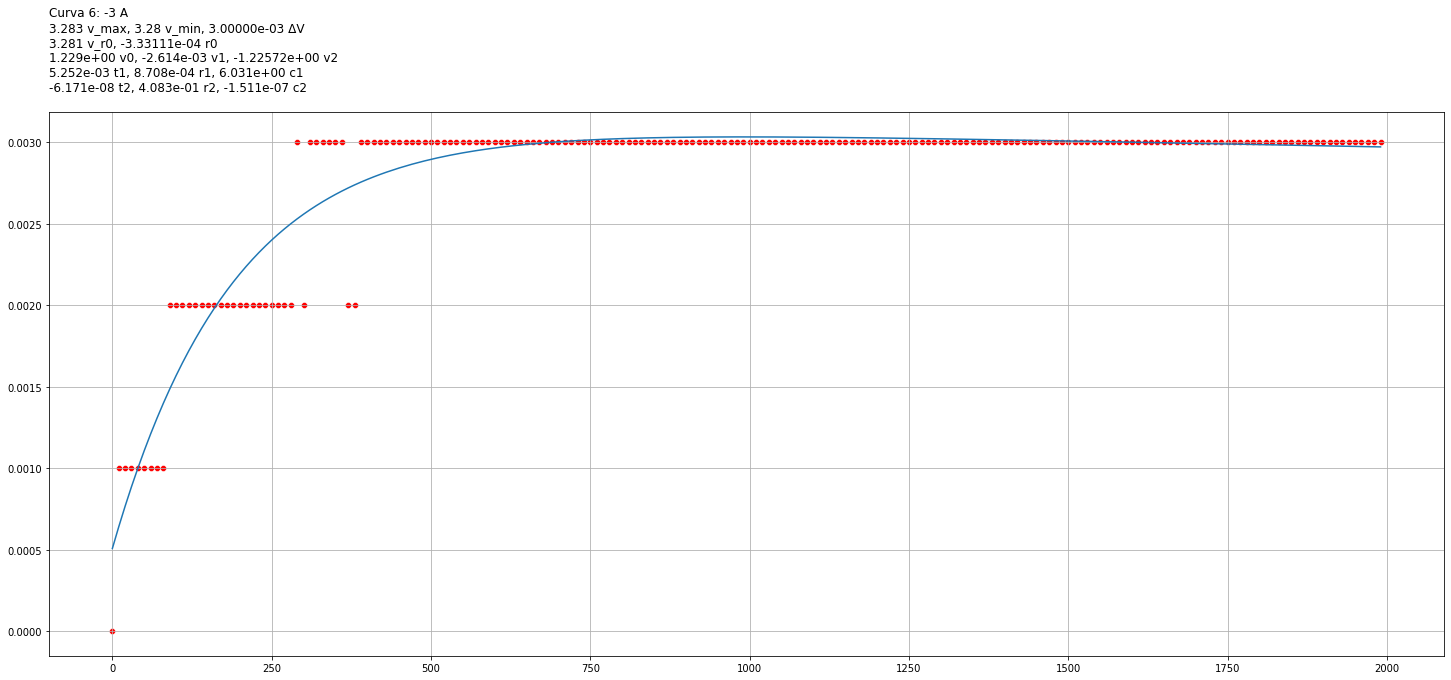

Curva 7: -3 A
3.263 v_max, 3.26 v_min, 3.00000e-03 ΔV
3.259 v_r0, 3.33111e-04 r0
1.271e+00 v0, -8.046e-04 v1, -1.26990e+00 v2
4.203e+00 t1, 2.680e-04 r1, 1.568e+04 c1
5.455e-07 t2, 4.230e-01 r2, 1.289e-06 c2 



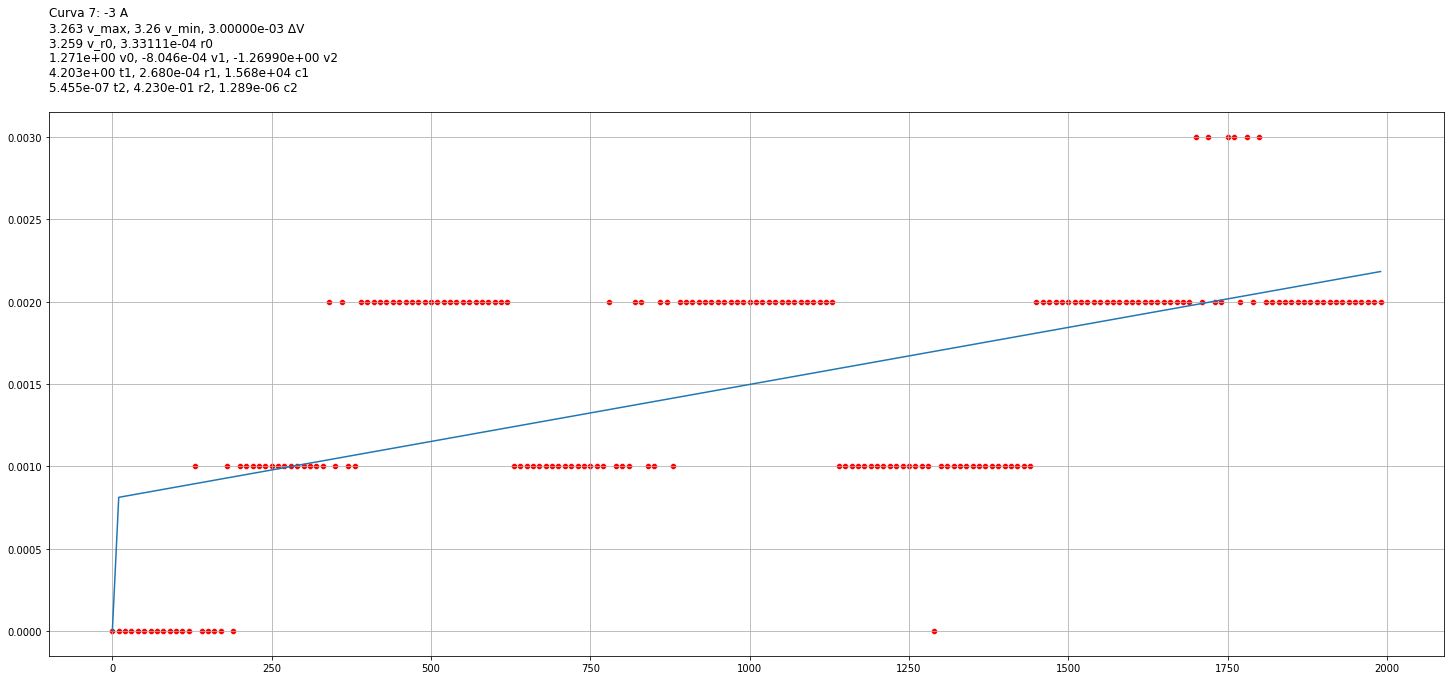

Curva 8: -3 A
3.197 v_max, 3.176 v_min, 2.10000e-02 ΔV
3.176 v_r0, 0.00000e+00 r0
1.227e+00 v0, -2.619e-01 v1, -1.24757e+00 v2
1.275e+01 t1, 8.723e-02 r1, 1.462e+02 c1
2.380e-05 t2, 4.156e-01 r2, 5.728e-05 c2 



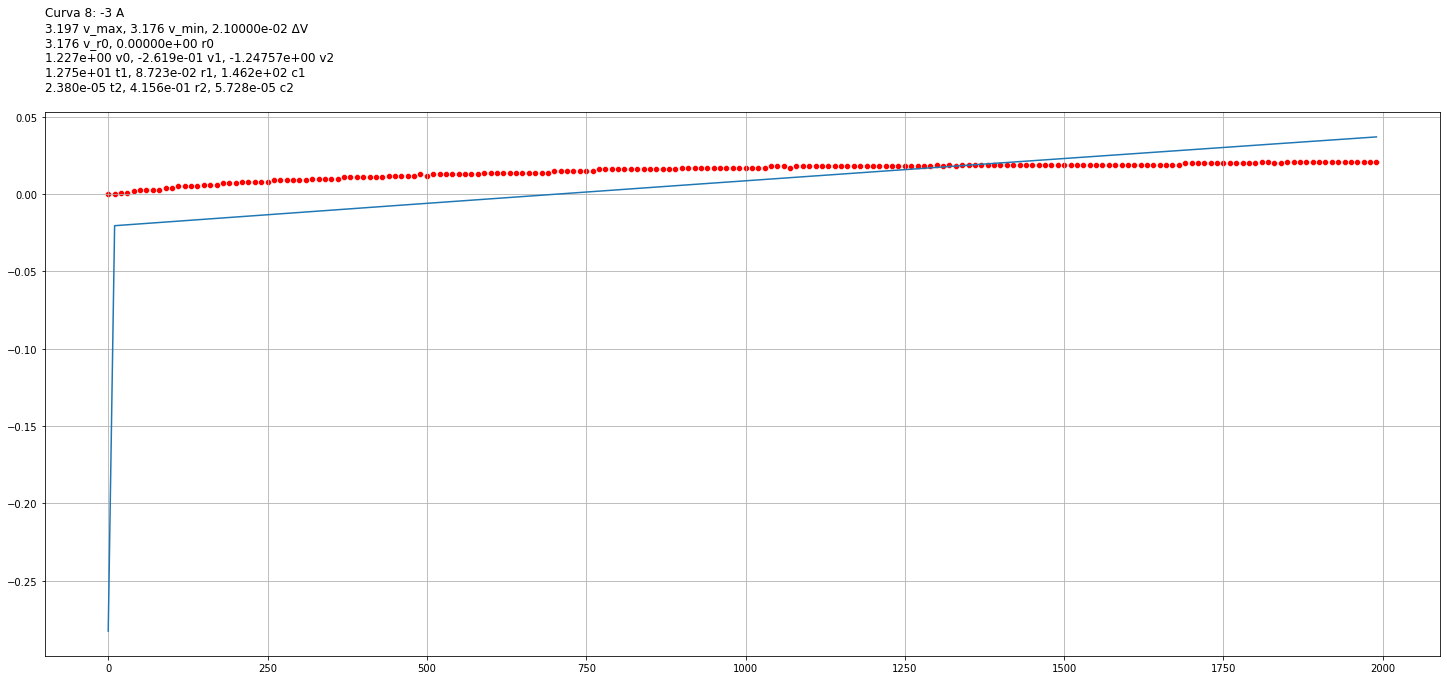

Curva 9: -3 A
3.197 v_max, 3.194 v_min, 3.00000e-03 ΔV
3.194 v_r0, 0.00000e+00 r0
2.109e+00 v0, -4.491e-02 v1, -2.09000e+00 v2
3.825e+01 t1, 1.496e-02 r1, 2.557e+03 c1
-5.694e-06 t2, 6.962e-01 r2, -8.178e-06 c2 



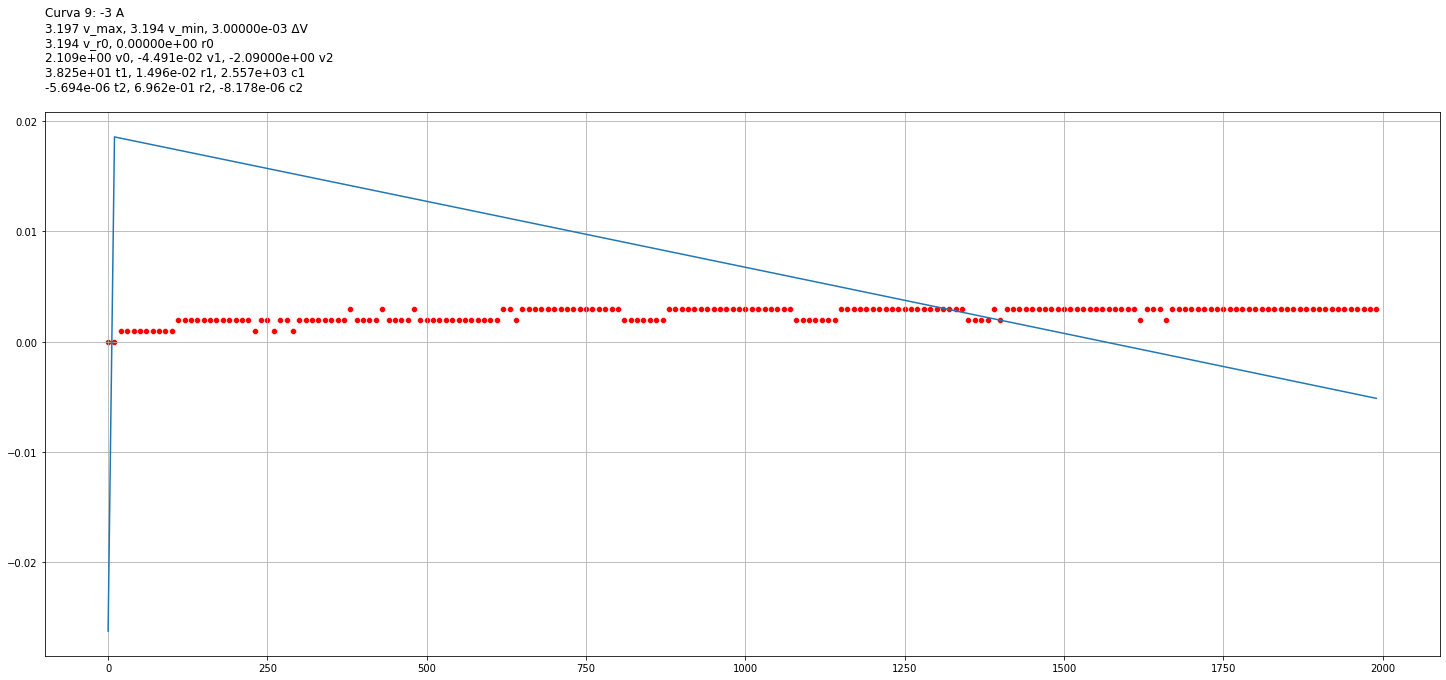

In [8]:
# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, 100, 100])

for i, p1 in enumerate(points3A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = vals[3]
    tau2 = vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = vals[1]/corrente
    r2 = vals[2]/corrente
    c1 = vals[3]*corrente/vals[1]
    c2 = vals[4]*corrente/vals[2]

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()
